# Praktikum 2
## vorbereitende Aufgaben - Aufgabe 2
### 1.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.signal as sci
import matplotlib.pyplot as plt
import Lab2Functions as ekg

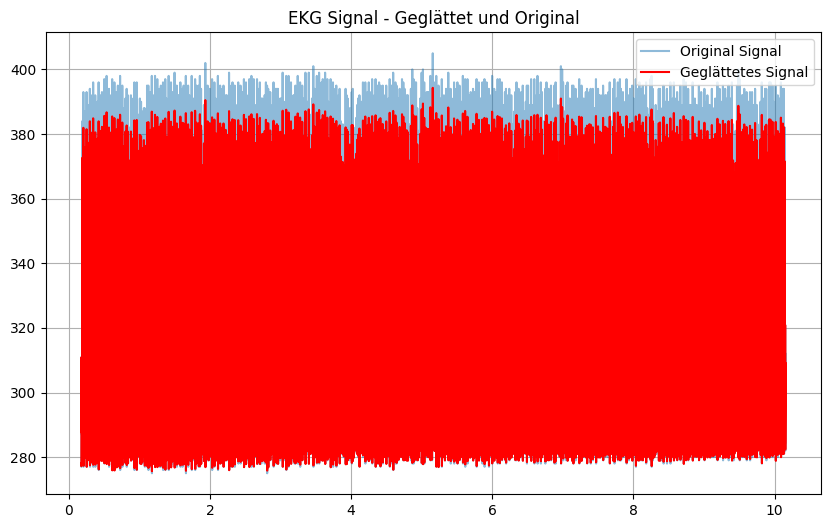

In [2]:
df = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
#df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
#df3 = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
time_ms = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal - Geglättet und Original')
plt.legend()
plt.grid()
plt.show()



### 1a)

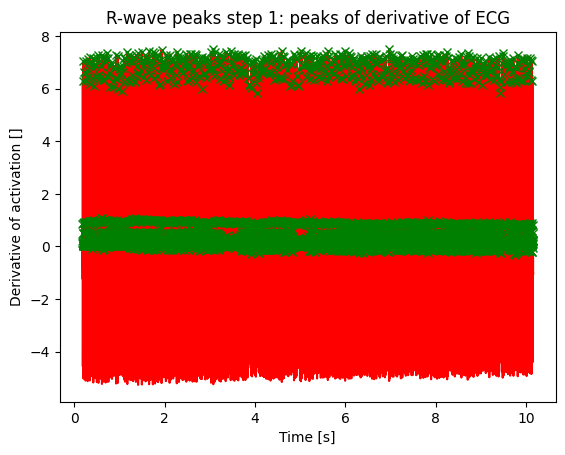

In [3]:
d_ecg, peaks_d_ecg = ekg.decg_peaks(ecg_filtered, time_ms)

### 1b)

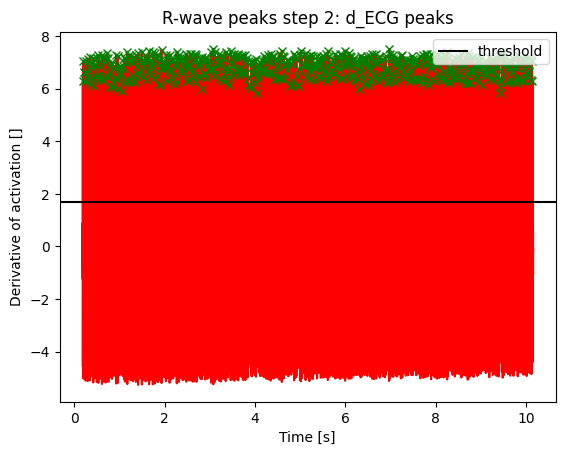

In [4]:
Rwave_peaks_d_ecg=ekg.d_ecg_peaks(d_ecg, peaks_d_ecg, time_ms, 0.4, 0.5)
#print(Rwave_peaks_d_ecg)    

### 1c)

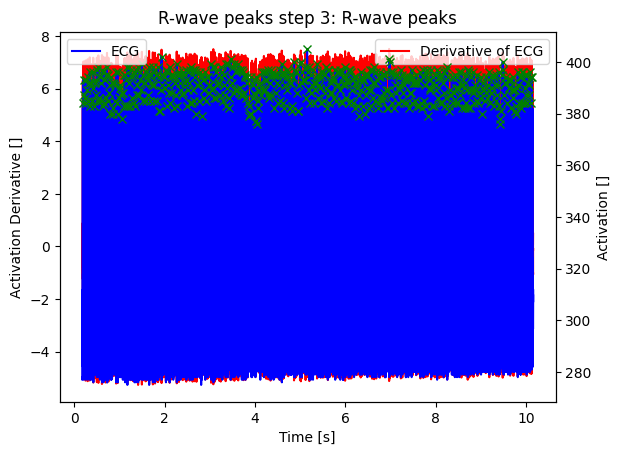

0       0.191533
1       0.206733
2       0.223183
3       0.237333
4       0.252200
         ...    
628    10.072583
629    10.088233
630    10.102183
631    10.116100
632    10.130417
Name: Millis, Length: 633, dtype: float64


In [5]:
Rwave_t = ekg.Rwave_peaks(ecg, d_ecg, Rwave_peaks_d_ecg, time_ms)
print(Rwave_t)

### 2.

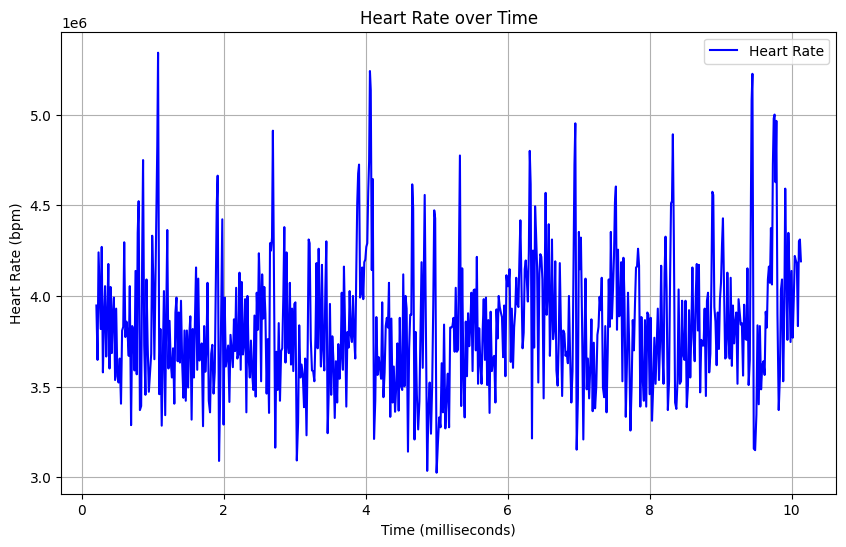

Heart Rate Variability (HRV): 373540.19961032964 bpm


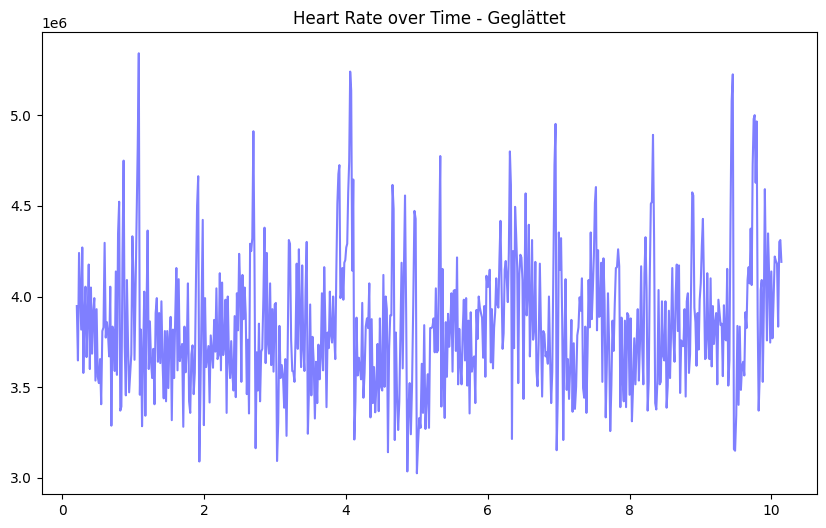

In [6]:
# Calculate the time differences between consecutive R-wave peaks
Rwave_intervals = np.diff(Rwave_t)

# Calculate the heart rate in beats per minute (bpm)
heart_rate = (60 / Rwave_intervals)*1000

# Create a new time series for the heart rate
exercise_hr = Rwave_t[1:]  # Exclude the first R-wave time as it has no preceding interval

# Plot the heart rate
plt.figure(figsize=(10, 6))
plt.plot(exercise_hr, heart_rate, label='Heart Rate', color='blue')
plt.title('Heart Rate over Time')
plt.xlabel('Time (milliseconds)')


plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid()
plt.show()

Wn=0.09
b2, a2=sci.butter(4, Wn, btype='low')
exercise_hr_filt=sci.filtfilt(b2, a2, exercise_hr)

plt.figure(figsize=(10, 6))
plt.plot(exercise_hr_filt, heart_rate, label='Heart Rate', color='blue', alpha=0.5)
plt.title('Heart Rate over Time - Geglättet')

# Calculate heart rate variability (HRV) as the standard deviation of the heart rate
hrv = np.std(heart_rate)
print(f'Heart Rate Variability (HRV): {hrv} bpm')



# Aufgaben Laborbericht
## Aufgabe 3 

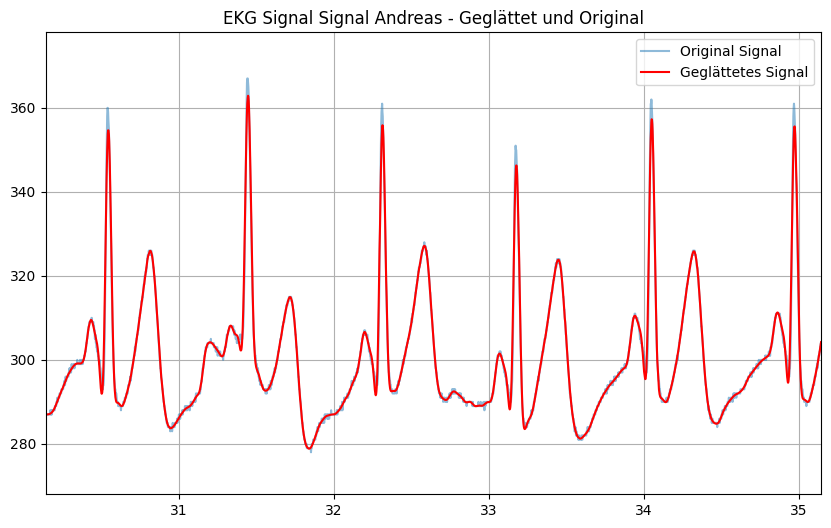

In [7]:
# Plot Ruhe Andreas
df = pd.read_csv('lab2code1_Ruhe_Andreas2.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Andreas - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



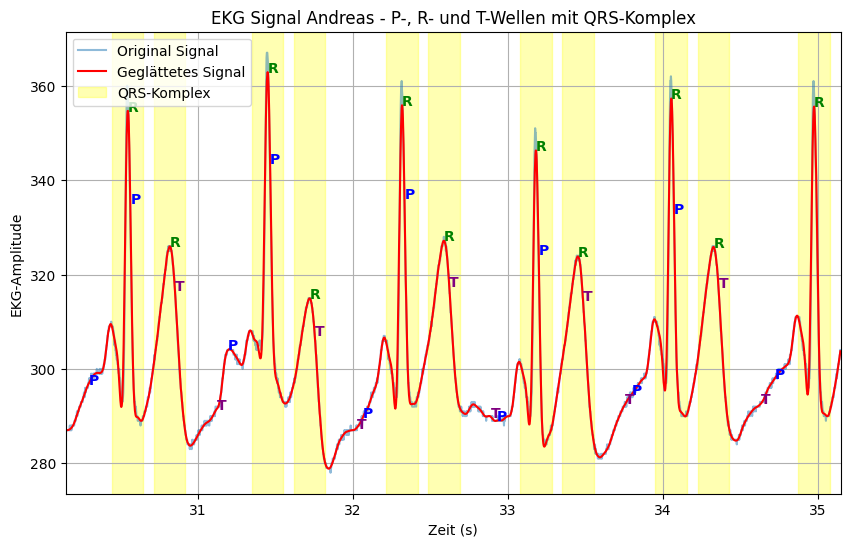

In [8]:
time_sec= time_ms / 1000
# Nur Daten für 5 Sekunden plotten
start_time = time_sec.iloc[0]
end_time = start_time + 5  
mask = (time_sec >= start_time) & (time_sec <= end_time)

# Gefilterte Daten beschränken
time_sec_plot = time_sec[mask]
ecg_filtered_plot = ecg_filtered[mask]
ecg_plot = ecg[mask]

# R-Spitzen erkennen (z. B. für QRS-Komplex)
distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand (200ms in Samples)
r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))

# QRS-Komplex: Q- und S-Punkte finden
qrs_windows = []
for peak in r_peaks:
    if start_time <= time_sec[peak] <= end_time:  # Nur Spitzen innerhalb des Plots
        window = int(100 / (time_ms[1] - time_ms[0]))  # 100ms vor und nach der R-Spitze
        q_idx = max(0, peak - window)
        s_idx = min(len(ecg_filtered) - 1, peak + window)
        qrs_windows.append((q_idx, s_idx))

# P- und T-Wellen schätzen
p_waves = [max(0, q - int(150 / (time_ms[1] - time_ms[0]))) for q, _ in qrs_windows]
t_waves = [min(len(ecg_filtered) - 1, s + int(200 / (time_ms[1] - time_ms[0]))) for _, s in qrs_windows]

# Plotten der EKG-Daten mit verbesserten Markierungen
plt.figure(figsize=(10, 6))
plt.plot(time_sec_plot, ecg_plot, label='Original Signal', alpha=0.5)
plt.plot(time_sec_plot, ecg_filtered_plot, label='Geglättetes Signal', color='red')

# QRS-Komplex als Rechtecke markieren
for q, s in qrs_windows:
    if start_time <= time_sec[q] <= end_time and start_time <= time_sec[s] <= end_time:
        plt.axvspan(time_sec[q], time_sec[s], color='yellow', alpha=0.3, label='QRS-Komplex')

# R-Spitzen als Buchstaben markieren
for r in r_peaks:
    if start_time <= time_sec[r] <= end_time:
        plt.text(time_sec[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')

# P- und T-Wellen als Buchstaben markieren
for p in p_waves:
    if start_time <= time_sec[p] <= end_time:
        plt.text(time_sec[p], ecg_filtered[p], 'P', color='blue', fontsize=10, fontweight='bold')
for t in t_waves:
    if start_time <= time_sec[t] <= end_time:
        plt.text(time_sec[t], ecg_filtered[t], 'T', color='purple', fontsize=10, fontweight='bold')

# Legende anpassen (verhindert doppelte Labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('EKG Signal Andreas - P-, R- und T-Wellen mit QRS-Komplex')
plt.xlabel('Zeit (s)')
plt.ylabel('EKG-Amplitude')
plt.grid()
plt.xlim(start_time, end_time)
plt.show()

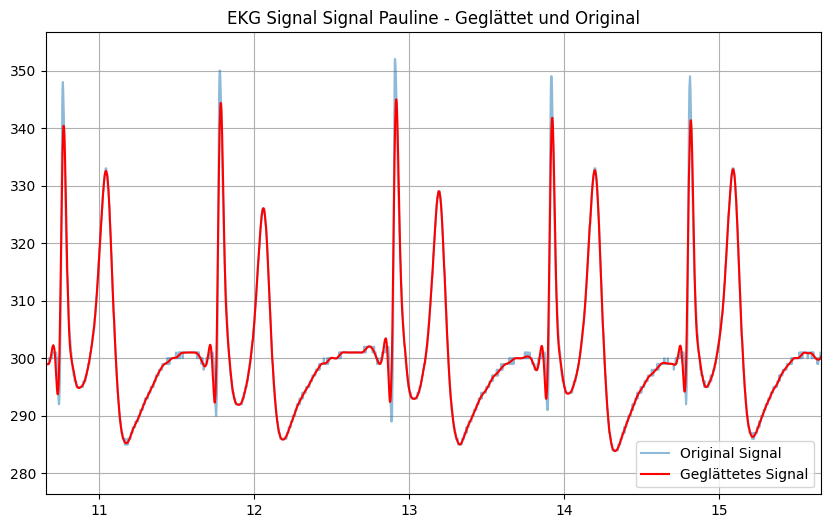

In [9]:
# Plot Ruhe Pauline
df = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Pauline - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



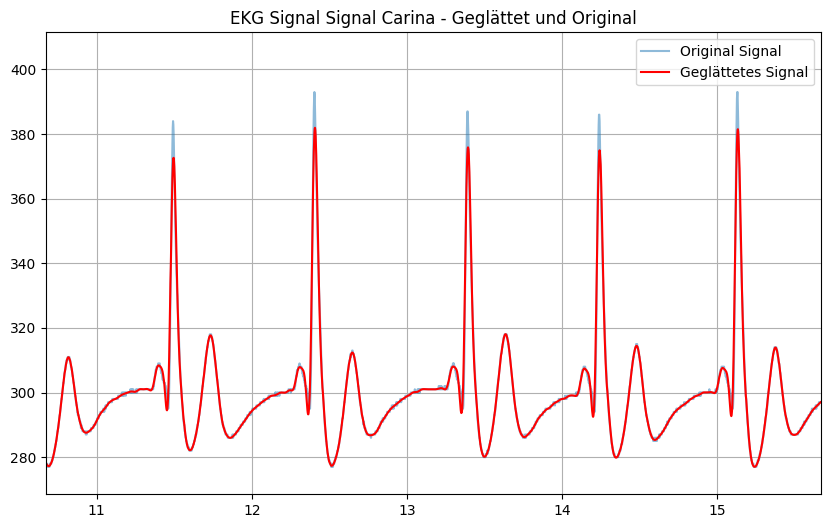

In [10]:
# Plot Ruhe Carina
df = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

# EKG plotten 
plt.figure(figsize=(10, 6))
plt.plot(time_sec, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_sec, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Carina - Geglättet und Original')
plt.legend()
plt.grid()

# nur 5 Sekunden vom Plot anzeigen
start_time = time_sec.iloc[0]
end_time = start_time + 5  

plt.xlim(start_time, end_time)
plt.show()



## Aufgabe 5

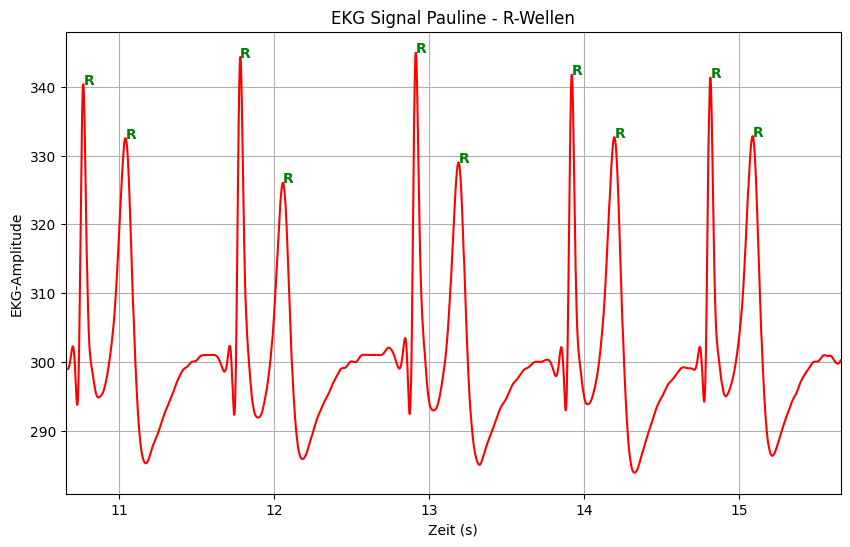

In [15]:
# Plot Ruhe Pauline
df = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']

#Zeit in Sekunden und Minuten
time_sec = time_ms / 1000 
time_minutes = time_sec / 60

#Signal glätten
Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg)

time_sec= time_ms / 1000
# Nur Daten für 5 Sekunden plotten
start_time = time_sec.iloc[0]
end_time = start_time + 5  
mask = (time_sec >= start_time) & (time_sec <= end_time)

# Gefilterte Daten beschränken
time_sec_plot = time_sec[mask]
ecg_filtered_plot = ecg_filtered[mask]
ecg_plot = ecg[mask]

# R-Spitzen erkennen (z. B. für QRS-Komplex)
distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand (200ms in Samples)
r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))


# Plotten der EKG-Daten mit verbesserten Markierungen
plt.figure(figsize=(10, 6))
#plt.plot(time_sec_plot, ecg_plot, label='Original Signal', alpha=0.5)
plt.plot(time_sec_plot, ecg_filtered_plot, label='Geglättetes Signal', color='red')


# R-Spitzen als Buchstaben markieren
for r in r_peaks:
    if start_time <= time_sec[r] <= end_time:
        plt.text(time_sec[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')


# Legende anpassen (verhindert doppelte Labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())

plt.title('EKG Signal Pauline - R-Wellen')
plt.xlabel('Zeit (s)')
plt.ylabel('EKG-Amplitude')
plt.grid()
plt.xlim(start_time, end_time)
plt.show()

### Aufgabe 6


Analyse für Carina:
Mittlere Herzfrequenz: 63.64 bpm
HRV (Standardabweichung der RR-Intervalle): 88.55 ms

Analyse für Pauline:
Mittlere Herzfrequenz: 62.04 bpm
HRV (Standardabweichung der RR-Intervalle): 88.96 ms

Analyse für Andreas:
Mittlere Herzfrequenz: 60.19 bpm
HRV (Standardabweichung der RR-Intervalle): 70.31 ms


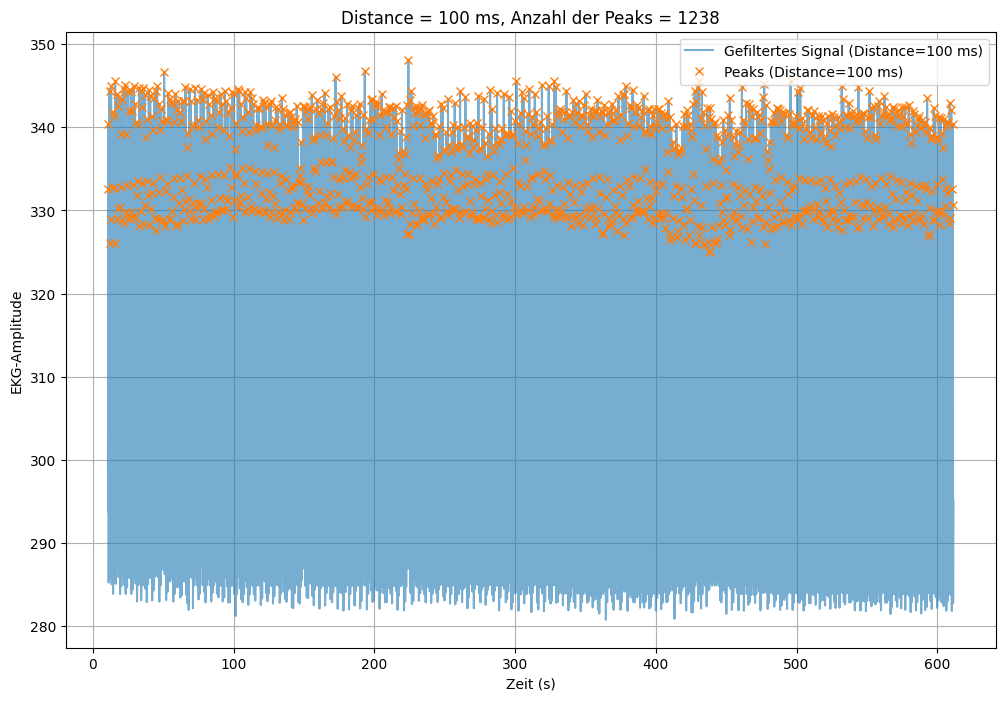

Distance: 100 ms, Anzahl der erkannten Peaks: 1238


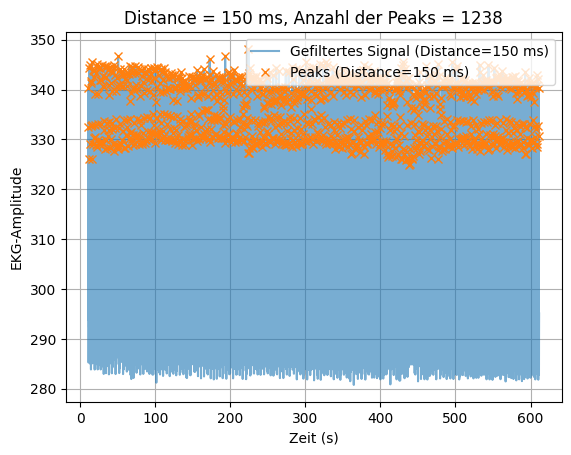

Distance: 150 ms, Anzahl der erkannten Peaks: 1238


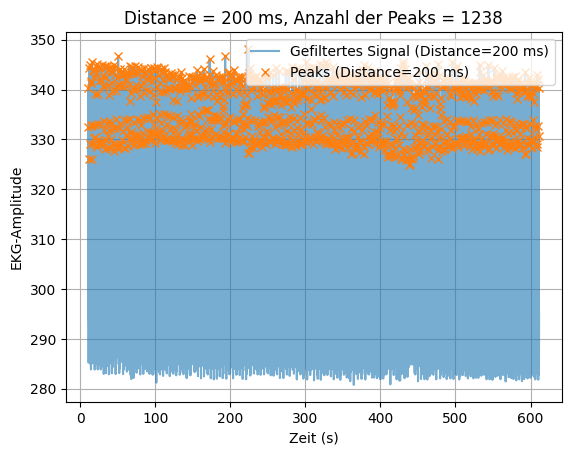

Distance: 200 ms, Anzahl der erkannten Peaks: 1238


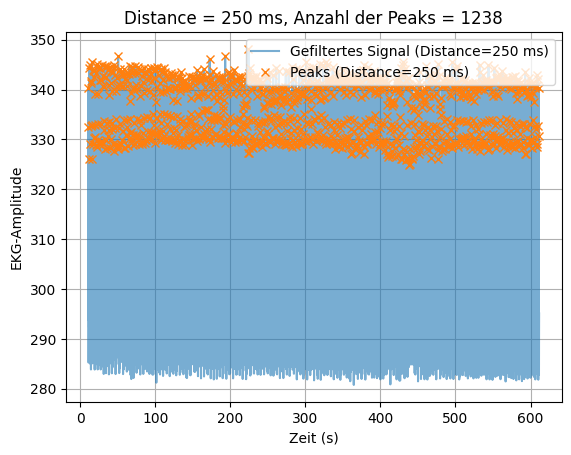

Distance: 250 ms, Anzahl der erkannten Peaks: 1238


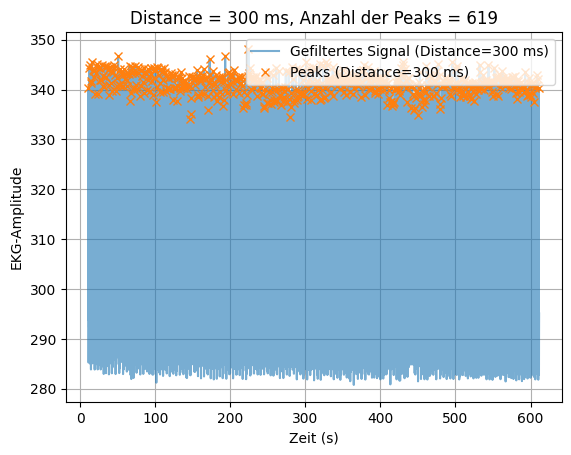

Distance: 300 ms, Anzahl der erkannten Peaks: 619


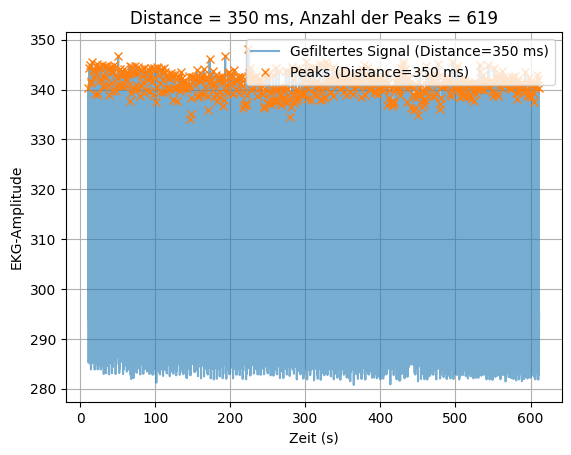

Distance: 350 ms, Anzahl der erkannten Peaks: 619


In [ ]:
def analyze_ecg(file_path, person_name):
    # CSV-Datei einlesen
    df = pd.read_csv(file_path, sep=';')
    time_ms = df['Millis']
    ecg = df['Value']

    # Tiefpassfilter anwenden
    Wn = 0.08
    b, a = sci.butter(4, Wn, 'low', analog=False)
    ecg_filtered = sci.filtfilt(b, a, ecg)

    # R-Zacken erkennen
    peaks, _ = sci.find_peaks(ecg_filtered, distance=200)  # Mindestabstand der Peaks kann angepasst werden

    # RR-Intervalle berechnen (in Millisekunden)
    rr_intervals = np.diff(time_ms[peaks])  # in Millisekunden

    # Mittlere Herzfrequenz berechnen (in bpm)
    average_hr = 60000 / np.mean(rr_intervals)  # Umrechnung von ms zu bpm

    # HRV berechnen (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals)  # in Millisekunden

    print(f"\nAnalyse für {person_name}:")
    print(f"Mittlere Herzfrequenz: {average_hr:.2f} bpm")
    print(f"HRV (Standardabweichung der RR-Intervalle): {hrv:.2f} ms")


# Analyse für Carina
analyze_ecg('lab2code1_Ruhe_Carina.csv', 'Carina')

# Analyse für Pauline
analyze_ecg('lab2code1_Ruhe_Pauline.csv', 'Pauline')

# Analyse für Andreas
analyze_ecg('lab2code1_Ruhe_Andreas2.csv', 'Andreas')



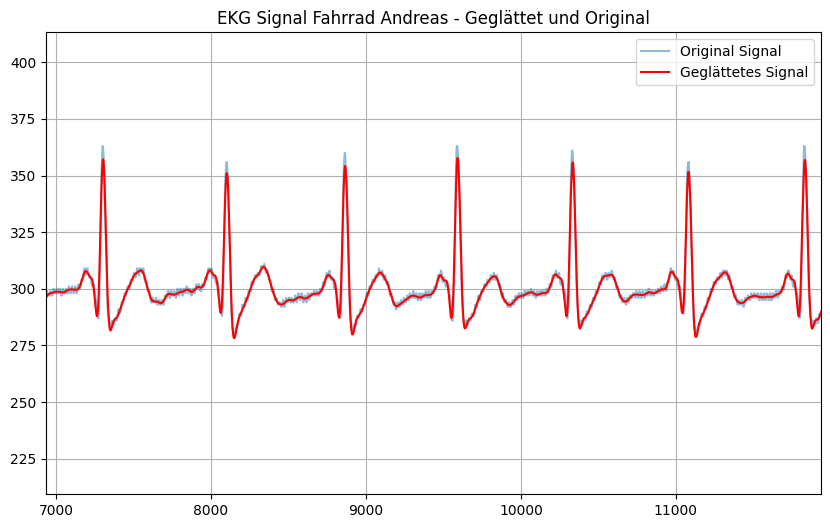

In [12]:
# Plot Fahrrad Andreas
df = pd.read_csv('lab2code1_Fahrrad_Andreas.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
#time_ms = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Fahrrad Andreas - Geglättet und Original')
plt.legend()
plt.grid()
# Display only 5 seconds of the plot
start_time = time_ms.iloc[0]
end_time = start_time + 5000  # 5 seconds later

plt.xlim(start_time, end_time)
plt.show()

